<a href="https://colab.research.google.com/github/Dutchman111/Player/blob/main/ANN%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('Churn_Modelling.csv')

In [44]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [46]:
X = df.iloc[:,3:13]

In [47]:
y = df.iloc[:,13]

In [48]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [49]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [50]:
# get dummies for categorical variables
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [51]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [52]:
##concatinate this variable with the dataset
X=X.drop(['Geography','Gender'],axis=1)

In [53]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [54]:
X = pd.concat([X,geography,gender],axis=1)

In [55]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [56]:
#splitting the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
##In ANN Feature scalling is very important
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [58]:
X_train  # Here data is completly transformed(standerd scalling)

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [59]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [60]:
X_train.shape

(8000, 11)

In [61]:
# ANN Part = Now create ANN network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

# WE need this libraries for creating N networks
# sequential-dense,activation

In [62]:
from pandas.core.base import SelectionMixin
## ANN
classifier=Sequential()

In [63]:
## input layer
classifier.add(Dense(units=11,activation='relu'))

In [88]:
## hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [89]:
## hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [90]:
## output
classifier.add(Dense(1,activation='sigmoid'))

In [91]:
## Optimizer for weight updation , adam optimizers are very good when compare to other optimizers
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
# here learning rate is bydefault in adam optimizer but if we want to change learning rate then =
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [93]:
# How many no. of epochs
###what should be my eplochs value = Early Stopping , this will decide when will we stoped at accuracy
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [94]:
model_history=classifier.fit(X_train,y_train,validation_split=0.30,batch_size=10, epochs=50, callbacks=early_stopping)

Epoch 1/50
560/560 [==============================] - 3s 4ms/step - loss: 0.5681 - accuracy: 0.8148 - val_loss: 0.4670 - val_accuracy: 0.8304
Epoch 2/50
560/560 [==============================] - 2s 4ms/step - loss: 0.4277 - accuracy: 0.8404 - val_loss: 0.3922 - val_accuracy: 0.8546
Epoch 3/50
560/560 [==============================] - 2s 4ms/step - loss: 0.4051 - accuracy: 0.8434 - val_loss: 0.3808 - val_accuracy: 0.8579
Epoch 4/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3996 - accuracy: 0.8457 - val_loss: 0.3797 - val_accuracy: 0.8533
Epoch 5/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3894 - accuracy: 0.8466 - val_loss: 0.3757 - val_accuracy: 0.8487
Epoch 6/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3819 - accuracy: 0.8500 - val_loss: 0.3761 - val_accuracy: 0.8500
Epoch 7/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3792 - accuracy: 0.8504 - val_loss: 0.3753 - val_accuracy: 0.8533
Epoch 

In [74]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

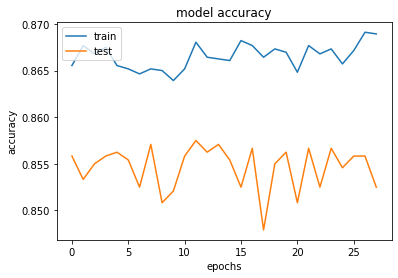

In [75]:
# History for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

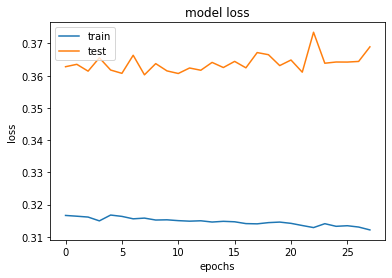

In [79]:
# history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [80]:
 #predictions for the test set results
 y_pred = classifier.predict(X_test)
 y_pred = (y_pred >= 0.5)

In [83]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1513,   82],
       [ 200,  205]])

In [86]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.859

In [87]:
## get the weights if you want to check
classifier.get_weights()

[array([[-0.1542578 ,  0.07902207,  0.392953  , -0.28466034, -0.02322468,
          0.43086925, -0.13465843,  0.14835545,  0.52006406,  0.24317007,
         -0.27018425],
        [-0.5876532 ,  0.819326  , -0.19070251, -0.11900598, -0.32754865,
         -0.7986386 ,  0.87780154, -0.3875775 , -0.29688185,  1.047338  ,
         -0.10880442],
        [-0.34986824, -0.31144246, -0.09782428, -0.0389151 , -0.13578883,
          0.3889824 , -0.30356172, -0.17864572, -0.04401693, -0.02942059,
          0.352422  ],
        [ 0.08063054, -0.20680235, -0.13358472, -1.0376678 , -0.28068697,
         -0.9166893 ,  0.09600362,  0.49281725, -0.24286282, -0.32019722,
         -0.04093553],
        [ 0.7563123 , -0.3273253 ,  1.3124435 , -0.42225793, -0.3319596 ,
          0.0896256 , -0.27124646, -0.52357405, -0.58258486, -0.44807327,
         -0.13348423],
        [-0.08437599,  0.29034987,  0.18136571,  0.11565153, -0.00315081,
         -0.16111061, -0.17630674,  0.04901835, -0.15370835, -0.0143327